<a href="https://colab.research.google.com/github/abanis24/Practice-ML/blob/main/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#  matplotlib_inline
import warnings

In [99]:
df = pd.read_csv('titanic.csv')

In [100]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [101]:
df.shape

(418, 12)

dataset contains 418 rows and 12 columns

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [103]:
df.drop(columns=['Cabin'],inplace=True)

In [104]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In Age column there are 86 null values.
In Fare column only 1 null value is present.


In [105]:
df['Embarked'].value_counts()

,count
Embarked,
S,270
C,102
Q,46


In [106]:
df['Fare'].value_counts()

,count
Fare,
7.7500,21
26.0000,19
13.0000,17
8.0500,17
7.8958,11
...,...
7.8208,1
8.5167,1
78.8500,1


In [107]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [108]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,0


In [109]:
mu=df['Age'].mean()
std=df['Age'].std()

train_age = np.random.randint(mu-std,mu+std,86)

In [110]:
train_age

array([39, 36, 38, 31, 42, 41, 18, 25, 18, 31, 34, 40, 22, 27, 40, 16, 28,
       30, 39, 35, 34, 42, 33, 17, 28, 27, 16, 31, 31, 23, 43, 43, 41, 37,
       34, 30, 36, 39, 35, 26, 38, 31, 41, 24, 33, 41, 19, 32, 18, 24, 41,
       43, 39, 30, 30, 37, 38, 42, 27, 21, 21, 29, 41, 20, 43, 26, 38, 19,
       36, 34, 35, 27, 33, 33, 42, 20, 29, 21, 19, 24, 37, 16, 16, 28, 38,
       31])

In [111]:
df['Age'][df['Age'].isnull()] = train_age

<ipython-input-111-eb487ee46494>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][df['Age'].isnull()] = train_age


In [112]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [113]:
df.groupby(['Pclass'])['Survived'].value_counts()

Pclass  Survived
1       0            57
        1            50
2       0            63
        1            30
3       0           146
        1            72
Name: count, dtype: int64

In [114]:
df.groupby(['Pclass'])['Survived'].mean()

,Survived
Pclass,
1,0.467290
2,0.322581
3,0.330275


In [115]:
df.groupby(['Sex'])['Survived'].value_counts()

,,count
Sex,Survived,
female,1,152
male,0,266


In [116]:
df.groupby(['Sex'])['Survived'].mean()

,Survived
Sex,
female,1.0
male,0.0


In [117]:
df.groupby(['Embarked'])['Survived'].value_counts()

Embarked  Survived
C         0            62
          1            40
Q         1            24
          0            22
S         0           182
          1            88
Name: count, dtype: int64

In [118]:
df.groupby(['Embarked'])['Survived'].mean()

,Survived
Embarked,
C,0.392157
Q,0.521739
S,0.325926


<ipython-input-119-ece81808f3c6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'][df['Survived']==0])
<ipython-input-119-ece81808f3c6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'][df['Survived']==1])


<Axes: xlabel='Age', ylabel='Density'>

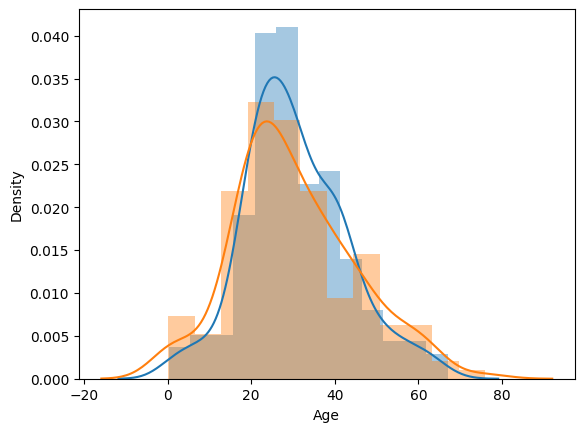

In [119]:
sns.distplot(df['Age'][df['Survived']==0])
sns.distplot(df['Age'][df['Survived']==1])

<ipython-input-120-00983ebab8f8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'][df['Survived']==0])
<ipython-input-120-00983ebab8f8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'][df['Survived']==1])


<Axes: xlabel='Fare', ylabel='Density'>

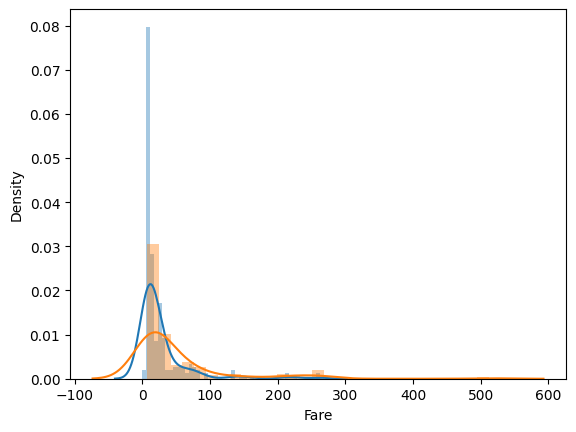

In [120]:
sns.distplot(df['Fare'][df['Survived']==0])
sns.distplot(df['Fare'][df['Survived']==1])

<Axes: xlabel='Age', ylabel='Count'>

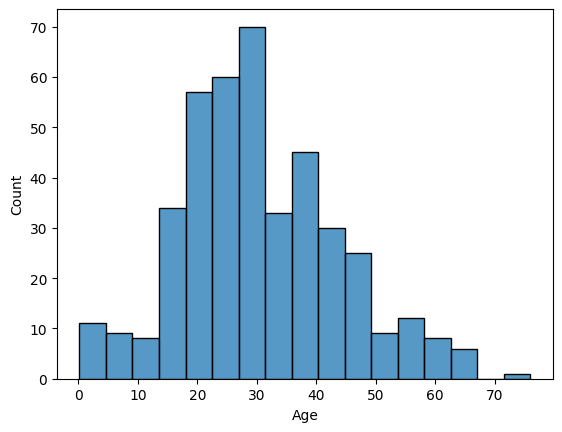

In [121]:
sns.histplot(df['Age'])

In [122]:
df.drop(columns=['Ticket'],inplace=True)

In [123]:
df['Family']=df['SibSp']+df['Parch']+1

In [124]:
df['Family'].value_counts()

,count
Family,
1,253
2,74
3,57
4,14
5,7
7,4
11,4
6,3
8,2


In [125]:
df.groupby(['Family'])['Survived'].mean()

,Survived
Family,
1,0.268775
2,0.486486
3,0.526316
4,0.714286
5,0.285714
6,0.666667
7,0.250000
8,0.500000
11,0.500000


In [126]:
def cal(number):
  if number == 1:
    return "Alone"
  elif number > 1 and number <5:
    return "Medium"
  else:
    return "Large"

In [127]:
df['Family_size']=df['Family'].apply(cal)

In [128]:
df['Family_size'].value_counts()

,count
Family_size,
Alone,253
Medium,145
Large,20


In [129]:
df.drop(columns=['SibSp','Parch','Family'],inplace=True)

In [130]:
df.shape

(418, 9)

In [131]:
df.drop(columns=['Name','PassengerId'],inplace=True)

In [132]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family_size'], dtype='object')

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    object 
 6   Family_size  418 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 23.0+ KB


In [134]:
df.shape

(418, 7)

In [135]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size
0,0,3,male,34.5,7.8292,Q,Alone
1,1,3,female,47.0,7.0000,S,Medium
2,0,2,male,62.0,9.6875,Q,Alone
3,0,3,male,27.0,8.6625,S,Alone
4,1,3,female,22.0,12.2875,S,Medium


In [136]:
columns_to_encode = ['Pclass','Sex','Embarked','Family_size']

In [137]:
df = pd.get_dummies(df,columns=columns_to_encode,drop_first=True,dtype=int)

In [138]:
df.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_size_Large,Family_size_Medium
0,0,34.5,7.8292,0,1,1,1,0,0,0
1,1,47.0,7.0000,0,1,0,0,1,0,1
2,0,62.0,9.6875,1,0,1,1,0,0,0
3,0,27.0,8.6625,0,1,1,0,1,0,0
4,1,22.0,12.2875,0,1,0,0,1,0,1


In [139]:
X=df.iloc[:,1:].values
Y=df.iloc[:,0].values

In [140]:
# split data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [141]:
X_train

array([[32.    , 13.    ,  1.    , ...,  1.    ,  0.    ,  0.    ],
       [24.    , 31.5   ,  1.    , ...,  1.    ,  0.    ,  1.    ],
       [27.    , 10.7083,  1.    , ...,  0.    ,  0.    ,  0.    ],
       ...,
       [46.    , 75.2417,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [24.    , 13.5   ,  1.    , ...,  1.    ,  0.    ,  0.    ],
       [39.    ,  7.75  ,  0.    , ...,  0.    ,  0.    ,  0.    ]])

In [142]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [144]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
model=classifier.fit(X_train,y_train)

In [147]:
y_pred = model.predict(X_test)

In [150]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y_pred,y_test)

1.0

In [151]:
cm = confusion_matrix(y_pred,y_test)

In [152]:
cm

array([[50,  0],
       [ 0, 34]])